# CuseHacks Datathon

### Datasets:
- Syracuse Roadwork Map

SYRCityline map seems cool
App that lets you report non-emergency problems in Syracuse. Things users can report:

Adopt-a-Block Trash Pick-Up
Dead/Loose Animal
Debris on Street or Road
Junk Cars/Yard Debris
Parks & Recreation Field Maintenance
Pothole
Snow Plow Request
Street Light Repair
Street Sign
Traffic Signal Issue
Trash/Illegal Dumping
Tree Limb Down/Obstructing Sidewalk
Vacant or Abandoned Buildings
Water Main Break/Leak
Carts
Bulk Setouts

### Clean data.
    - We will need a NLP text-classification model to label our data for us into different categories.
    - Take care of issues that were not closed
    - Figure out how to account for issues that have no closed (which issues have higher probability of not closing?)

Main question to ask: How efficient is the city at resolving issues?

We can also get the time taken to resolve an issue and see how long it takes to resolve different types of issues

### Question: How efficient is the city at resolving issues? What type of complaints get the most attention?
       What type of complaints get the most attention?
           - Analyze which type of complaint takes longest to resolve (what can city get better at)
           - Analyze which type of complaint takes shortest to resolve (what does city prioritize)
                - Stacked bar charts, complaint types by resolution time
           - Maybe analyze other similar-sized cities?


           - Which department does a good job at fixing results?
           - Make a ML model that predicts how long an issue will take to fix depending on issue type
                   - Consider linear regression
                   - Consider decision tree regressor
                   - Consider random forest regressor

In [196]:
import pandas as pd
import numpy as np

data = pd.read_csv("SYRCityline_Requests.csv")
data.head()

,X,Y,Id,Summary,Rating,Address,Description,Agency_Name,Request_type,Lat,...,Created_at_local,Acknowledged_at_local,Closed_at_local,Minutes_to_Acknowledge,Minutes_to_Close,Assignee_name,Category,Sla_in_hours,Report_Source,ObjectId
0,-8.472894e+06,5.319007e+06,18198655,Sewer Back-ups (INTERNAL),1,"435 Ellis St Syracuse, New York, 13210",Dina 450-3461,Water & Sewage,35820.0,43.0462,...,01/14/2025 - 11:19AM,NaN,NaN,NaN,NaN,Assistant Superintendent of Sewers,Sewer Back-ups (INTERNAL),24.0,Request Form,1
1,-8.479295e+06,5.320378e+06,18214945,Other Sewer-related Concerns,1,"609 N Geddes St Syracuse, New York, 13204",Jet Flush- Jerry 439-6961,Water & Sewage,33840.0,43.0552,...,01/16/2025 - 03:37PM,NaN,NaN,NaN,NaN,Assistant Superintendent of Sewers,Other Sewer-related Concerns,24.0,Request Form,2
2,-8.476745e+06,5.313388e+06,18214845,Report Improperly Set Out Trash or Recycling (...,1,"3138 Midland Ave Syracuse NY 13205, United States",NaN,"Garbage, Recycling & Graffiti",34425.0,43.0093,...,01/16/2025 - 03:26PM,NaN,NaN,NaN,NaN,Public Works Inspector- SP,Report Improperly Set Out Trash or Recycling (...,72.0,iPhone,3
3,-8.477781e+06,5.324004e+06,18214835,Traffic & Parking Signs,1,"406 Willumae Dr Syracuse NY 13208, United States",Damaged sign down,Streets & Transportation,34423.0,43.0790,...,01/16/2025 - 03:25PM,NaN,NaN,NaN,NaN,Superintendent of Transportation,Traffic & Parking Signs,120.0,iPhone,4
4,-8.475632e+06,5.320393e+06,18214821,Report an illegally parked vehicle,1,"300-300 Green St Syracuse, NY, 13203, USA",Cars parked illegally and not following odd ev...,Parking & Vehicles,33844.0,43.0553,...,01/16/2025 - 03:24PM,NaN,NaN,NaN,NaN,Syracuse Police Ordinance,Report an illegally parked vehicle,72.0,Portal,5


In [197]:
data["Category"].unique().tolist()

['Sewer Back-ups (INTERNAL)',
 'Other Sewer-related Concerns',
 'Report Improperly Set Out Trash or Recycling (Illegal Setout)',
 'Traffic & Parking Signs',
 'Report an illegally parked vehicle',
 'Animal Control',
 'Report a Skipped Weekly Trash Pick Up (Internal)',
 'Report a Pothole',
 'Cart Stolen',
 'Cart Broken',
 'Report Litter on Private Land',
 'Traffic Signals',
 'Other Parks, Trees & Public Utilities Concern',
 'Pavement Markings',
 'Report an Abandoned Vehicle',
 'Report a Skipped Weekly Trash Pick Up',
 'Report Trash/Debris Outside a Home/Building',
 'Vacant Buildings',
 'Tree Care and Removal',
 'Report Litter on Public Land',
 'Home & Building Maintenance',
 'Report internal structural damage of a Catch Basin/Storm Drain',
 'Report a Skipped Recycling Pick Up (Internal)',
 'Property Damage- INTERNAL',
 'Report a Skipped Bulk Pick Up (Internal)',
 'Sanitation Exempt Skipped',
 'Trash Can on Public Land',
 'Report a Skipped Recycling Pick Up',
 'Tires',
 'Report a Skipped 

| **Category** | **Subcategories** |
|-------------|-------------------|
| Water - Sewer-Related | Sewer Back-ups (INTERNAL), Report internal structural damage of a Catch Basin/Storm Drain, Other Sewer-related Concerns, Water-related Concerns, Report external dirt/debris blocking a Catch Basin/Storm Drain, Report a Problem with a Catch Basin/Storm Drain, Other Water & Sewage Concern, Report internal clogging of a Catch Basin/Storm Drain |
| Traffic and Parking Signs | Traffic & Parking Signs, Traffic Signals, Street Lights, Pavement Markings |
| Trash-collection | Report a Skipped Weekly Trash Pick Up (Internal), Report a Skipped Weekly Trash Pick Up, Report a Skipped Recycling Pick Up (Internal), Report a Skipped Bulk Pick Up (Internal), Report a Skipped Bulk Pick Up, Report a Skipped Recycling Pick Up, Weekly Trash Pickup, Large or Bulk Items - Skipped Pickup, Recycling (pick up that has been skipped) |
| Litter | Report Litter on Private Land, Report Litter on Public Land, Adopt-A-Block Earth Day Litter Pickup Request |
| Vehicle-related | Report an Abandoned Vehicle, Report an illegally parked vehicle, Other Parking & Vehicles Concern, Parking Tickets |
| Animal-related | Animal Control, Dog Control, Other Animal-related Concern, Deer Sighting |
| Roadkill | Report Roadkill |
| Pothole | Report a Pothole, Potholes |
| Cart | Cart Stolen, Cart Broken, Cart Feedback, Sanitation Carts, Mixed-Use Cart Request, Second Cart Request, Sanitation Cart Not Received, Cart Not Delivered, Carts-Wrong Number of Carts Delivered, Carts-Request an Elderly or Disabled Service |
| Parks & Trees | Other Parks, Trees & Public Utilities Concern, Tree Care and Removal, Park Maintenance, Request a free street tree planting (City of Syracuse Property Owners Only), Playground Equipment |
| Abandoned Property | Vacant Buildings, Vacant Land |
| Property-Maintenance | Property Damage- INTERNAL, Home & Building Maintenance, Other Housing & Property Maintenance Concern, Housing & Property Maintenance |
| Random | Please use this space to provide feedback to the City |
| Sanitation-related | Illegal setout/sanitation violation dispute, Sanitation Exempt Skipped, Sanitation Exempt Skipped (recycling), Other Garbage & Recycling |
| Graffiti | Graffiti on Private Land, Graffiti on Public Land |
| Parking Meter | Report an illegally parked vehicle |
| Illegal Setouts | Report Improperly Set Out Trash or Recycling (Illegal Setout), Illegal Setouts |
| Streets and Sidewalk | Sidewalks, Other Streets, Sidewalks & Transportation Concern, Streets, Sidewalks & Transportation, Curb/Sidewalk Removal Concerns, Unshoveled Sidewalks |
| Health, Safety and Social Services | Other Health, Safety & Social Services Concern, Health, Safety and Social Services |
| Codes Violations/Dispute | Codes Violations/Dispute |
| Snow & Ice | Snow & Ice |
| Construction Debris | Construction Debris, Request Construction Debris Pick Up (May and September Only) |
| Report Source | To report an illegally parked vehicle, please call the Syracuse Police Ordinance at 315-448-8650. If this is an emergency, please call 911. Do NOT submit requests to Cityline. To report an abandoned vehicle, please call the Syracuse Police Ordinance at 315-448-8650. If this is an emergency, please call 911. Do NOT submit requests to Cityline. |

In [198]:
category = pd.read_csv("DatathonCategories.csv")

category.head()

,Water/Sewer-Related,Traffic and Parking Signs,Trash-collection,Litter,Vehicle-related,Animal-related,Roadkill,Pothole,Cart,Parks & Trees,...,Graffiti,Parking Meter,Illegal Setouts,Streets and Sidewalk,"Health, Safety and Social Services",Codes Violations/Dispute,Snow & Ice,Construction Debris,Unnamed: 22,Unnamed: 23
0,Sewer Back-ups (INTERNAL),Traffic & Parking Signs,Report Improperly Set Out Trash or Recycling (...,Report Litter on Private Land,NaN,Animal Control,Report Roadkill,Report a Pothole,Cart Stolen,"Other Parks, Trees & Public Utilities Concern",...,Graffiti on Private Land,Report an illegally parked vehicle,Illegal Setouts,Sidewalks,"Other Health, Safety & Social Services Concern",Codes Violations/Dispute,Snow & Ice,Construction Debris,NaN,NaN
1,Report internal structural damage of a Catch B...,Traffic Signals,Report a Skipped Weekly Trash Pick Up (Internal),NaN,Report an Abandoned Vehicle,Deer Sighting,Roadkill,Potholes,Cart Broken,Tree Care and Removal,...,Graffiti on Public Land,Other Parking & Vehicles Concern,NaN,"Other Streets, Sidewalks & Transportation Concern","Health, Safety and Social Services",NaN,Unshoveled Sidewalks,Request Construction Debris Pick Up (May and S...,NaN,NaN
2,Other Sewer-related Concerns,Street Lights,Report a Skipped Weekly Trash Pick Up,Report Trash/Debris Outside a Home/Building,Tires,Dog Control,NaN,NaN,Cart Feedback,Internal Landscaping Projects,...,NaN,Parking Tickets,NaN,"Streets, Sidewalks & Transportation",NaN,NaN,NaN,NaN,NaN,NaN
3,Water-related Concerns,NaN,Report a Skipped Recycling Pick Up (Internal),Report Litter on Public Land,NaN,Other Animal-related Concern,NaN,NaN,Sanitation Carts,Report Overgrowth on Public land,...,NaN,NaN,NaN,Pavement Markings,NaN,NaN,NaN,NaN,NaN,NaN
4,Report external dirt/debris blocking a Catch B...,NaN,Report a Skipped Bulk Pick Up (Internal),Trash Can on Public Land,NaN,NaN,NaN,NaN,Cart Not Delivered,Park Maintenance,...,NaN,NaN,NaN,Curb/Sidewalk Removal Concerns,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Water/Sewer-Related                 8 non-null      object 
 1   Traffic and Parking Signs           3 non-null      object 
 2   Trash-collection                    13 non-null     object 
 3   Litter                              9 non-null      object 
 4   Vehicle-related                     2 non-null      object 
 5   Animal-related                      4 non-null      object 
 6   Roadkill                            2 non-null      object 
 7   Pothole                             2 non-null      object 
 8   Cart                                10 non-null     object 
 9   Parks & Trees                       12 non-null     object 
 10  Abandoned Property                  2 non-null      object 
 11  Property-Maintenance                4 non-null 

In [200]:
category_mapping = {}

# this will convert our category dataframe into a dictionary where each general category has a list of subcategories
for col in category.columns:                            # loops through category columns
    subcategories = category[col].dropna().tolist()   # gets all our subcategories taking into account nulls
    for subcat in subcategories:
        category_mapping[subcat] = col             # maps the subcategory to general category

# maps category column in data to general category
data["Consolidated Category"] = data["Category"].map(category_mapping)
data[["Category", "Consolidated Category"]].head()

,Category,Consolidated Category
0,Sewer Back-ups (INTERNAL),Water/Sewer-Related
1,Other Sewer-related Concerns,Water/Sewer-Related
2,Report Improperly Set Out Trash or Recycling (...,NaN
3,Traffic & Parking Signs,Traffic and Parking Signs
4,Report an illegally parked vehicle,Parking Meter


In [201]:
data["Minutes_to_Close"].isnull().sum()
# our data has 5450 null values for minutes_to_close

# this will count how many null values we have per consolidated categories. essentially this is how many unresolved cases we have by category
categoryNulls = {}
for category in data["Consolidated Category"].unique():
    categoryNulls[category] = data[data["Consolidated Category"] == category]["Minutes_to_Close"].isnull().sum()

for key, value in categoryNulls.items():
    print(key, value)

Water/Sewer-Related 957
nan 0
Traffic and Parking Signs 164
Parking Meter 103
Animal-related 37
Trash-collection 718
Pothole 120
Cart 1325
Litter 454
Parks & Trees 420
Streets and Sidewalk 267
Vehicle-related 137
Abandoned Property 24
Property-Maintenance 152
Sanitation-related 96
Random 104
Graffiti 13
Roadkill 27
Illegal Setouts 134
Codes Violations/Dispute 2
Construction Debris 21
Snow & Ice 16
Health, Safety and Social Services 1


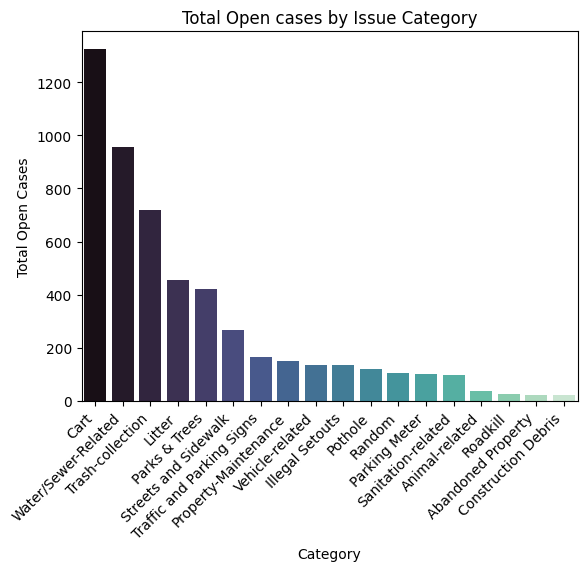

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
# plot Open cases by Issue Category

df = pd.DataFrame(categoryNulls.items(), columns=["Category", "Open Cases"])
newdf = df[df["Open Cases"] > 20].sort_values("Open Cases", ascending=False)
# plt.figure(figsize=(12, 6))  # Adjust figure size

sns.barplot(data=newdf, x="Category", y="Open Cases", hue="Category", palette="mako")
plt.xticks(rotation=45, ha="right")  # Rotate 45 degrees and align text to the right
plt.title("Total Open cases by Issue Category")
plt.ylabel("Total Open Cases")

plt.show()



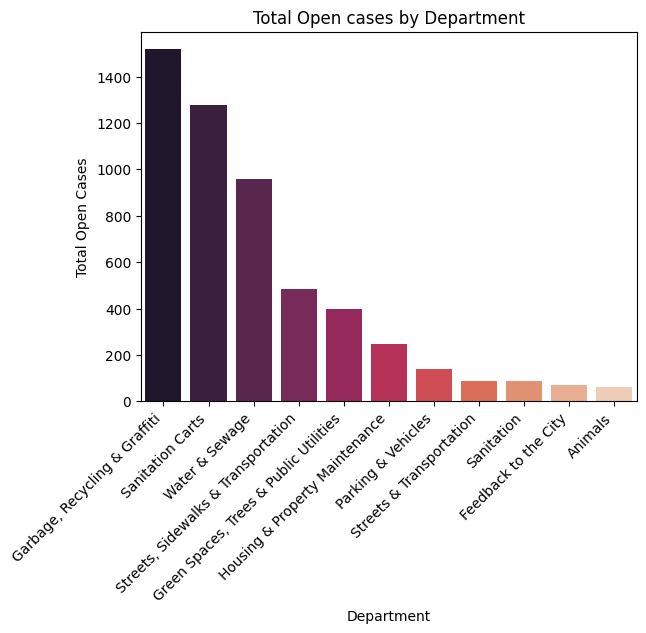

In [203]:
# this is how many unresolved cases we have by department

departmentNulls = {}
for department in data["Agency_Name"].unique():
    departmentNulls[department] = data[data["Agency_Name"] == department]["Minutes_to_Close"].isnull().sum()

import matplotlib.pyplot as plt
# plot Open cases by Issue Category

df = pd.DataFrame(departmentNulls.items(), columns=["Department", "Open Cases"])
newdf = df[df["Open Cases"] > 5].sort_values("Open Cases", ascending=False)

sns.barplot(data=newdf, x="Department", y="Open Cases", hue="Department", palette="rocket")
plt.xticks(rotation=45, ha="right")  # Rotate 45 degrees and align text to the right
plt.title("Total Open cases by Department")
plt.ylabel("Total Open Cases")

plt.show()

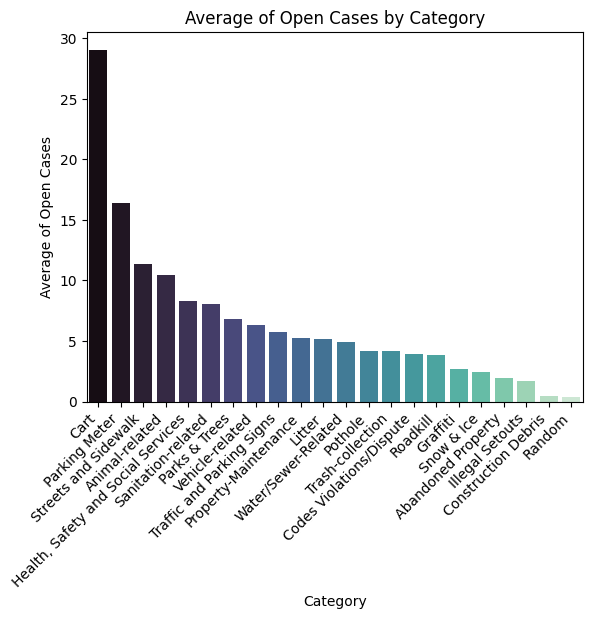

In [217]:
# now we need to find the average of open cases compared to total number of cases for category

categoryPercentages = {}
total_cases = 0
# get total number of cases per category (including opened and closed cases)
for category in data["Consolidated Category"].unique():
    total_cases = data[data["Consolidated Category"] == category].shape[0]  # this will get us the total number of cases per category
    categoryPercentages[category] = total_cases

    openCases = categoryNulls[category]

    if total_cases > 0:  # this avoids division by 0
        categoryPercentages[category] = (openCases / total_cases) * 100
    else:
        categoryPercentages[category] = 0

df = pd.DataFrame(categoryPercentages.items(), columns=["Category", "Total Cases"]).sort_values("Total Cases", ascending=False) # puts into df
df.head()
# data[data["Consolidated Category"] ==]

import matplotlib.pyplot as plt

# plot Open cases averages by Issue Category
df = pd.DataFrame(categoryPercentages.items(), columns=["Category", "Total Cases"]).sort_values("Total Cases", ascending=False)

sns.barplot(data=df, x="Category", y="Total Cases", hue="Category", palette="mako", legend=False)
plt.xticks(rotation=45, ha="right")  # Rotate 45 degrees and align text to the right
plt.title("Average of Open Cases by Category")
plt.ylabel("Average of Open Cases")

plt.show()

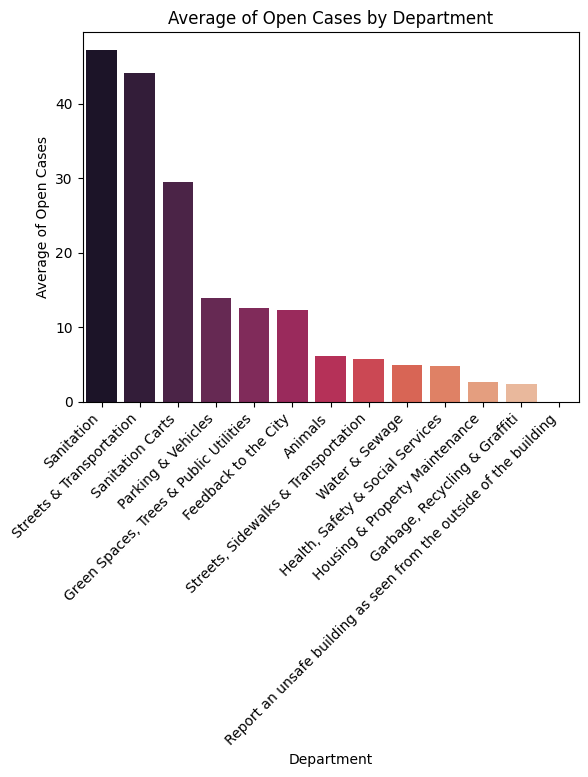

In [215]:
# now we need to find the average of open cases compared to total number of cases for departments

departmentPercentages = {}
total_cases = 0
# get total number of cases per category (including opened and closed cases)
for department in data["Agency_Name"].unique():
    total_cases = data[data["Agency_Name"] == department].shape[0]  # this will get us the total number of cases per category
    departmentPercentages[department] = total_cases

    openCases = departmentNulls[department]

    if (total_cases > 0) and total_cases != 1:  # this avoids division by 0
        departmentPercentages[department] = (openCases / total_cases) * 100
    else:
        departmentPercentages[department] = 0


import matplotlib.pyplot as plt

# plot Open cases averages by Issue Category
df = pd.DataFrame(departmentPercentages.items(), columns=["Department", "Open Case Percentage"]).sort_values("Open Case Percentage", ascending=False)

# remove irrelevant departments in df which idk why they're there
excluded_departments = ["1", "0", "Report a missing traffic/parking sign", "Which of the following best describes your concern?", "Report a maintenance issue"]
df = df[~df["Department"].isin(excluded_departments)]

sns.barplot(data=df, x="Department", y="Open Case Percentage", hue="Department", palette="rocket", legend=False)
plt.xticks(rotation=45, ha="right")  # Rotate 45 degrees and align text to the right
plt.title("Average of Open Cases by Department")
plt.ylabel("Average of Open Cases")

plt.show()

We see that carts (trash carts) have the highest number of unresolved issues in Syracuse. Water and sewer related is next

We see that by department, the Assistant Superintendent of Sewers and Sanitation_Crew_Group have the most amount of unresolved cases in Syracuse.